<a href="https://colab.research.google.com/github/Shashank432000/PYTHON/blob/main/Cloth_Size_Predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

 # <center> **Cloth Size Predictor**<center>

## **Objective**

Create a machine learning model to predict clothing sizes based on age, weight, and height, aiming to improve the shopping experience and reduce returns for customers and retailers.

## **Data Source**

https://drive.google.com/file/d/1D0cOiBVsnMdMI7jMhWHNIiCOUVFOZocQ/view?usp=sharing

## **Import Library**

In [1]:
#Common Library for exploratory data analysis and creating visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

## **Import Data**

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1D0cOiBVsnMdMI7jMhWHNIiCOUVFOZocQ')

## **Describe Data**

In [3]:
# Top 5 rows of Data
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
#Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


* We can there are 4 columns and 119734 rows.
* There are some missing values in *age,height* column.
* The data types include int64, float64, or Object.

In [5]:
# Summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,119734.0,61.756811,9.944863,22.00,55.00,61.0,67.00,136.00
age,119477.0,34.027311,8.149447,0.00,29.00,32.0,37.00,117.00
height,119404.0,165.805794,6.737651,137.16,160.02,165.1,170.18,193.04


* Weights range from 22.00 to 136.00, with an average of 61.76.
* Ages vary from 0 to 117, with an average of 34.03. The presence of 0 as the minimum age might indicate invalid data.
* Heights range from 137.16 to 193.04, averaging at 165.81. The heights appear relatively consistent.

In [6]:
# Unique value in size clumns
print(df["size"].unique())
print(f"There are {df['size'].nunique()} values in size column.")

['XL' 'L' 'M' 'S' 'XXS' 'XXXL' 'XXL']
There are 7 values in size column.


In [7]:
# Checking for duplicates
df.duplicated().sum()

92330

* Observing a significant presence of duplicate values within our dataset.

In [8]:
# Null values count
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

- Column "age" has 257 missing values.
- Column "height" has 330 missing values.

## **Data Visualization**

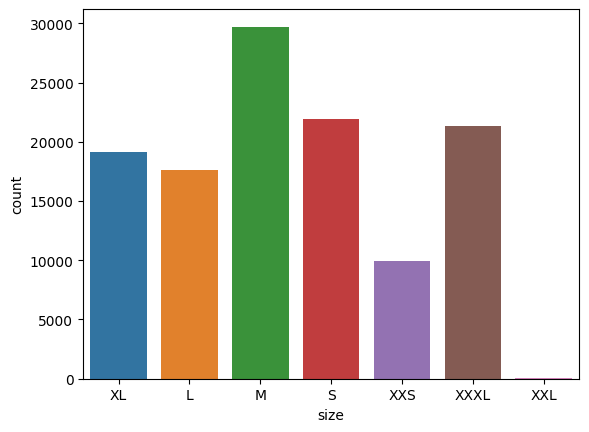

In [9]:
# Number of occurences for each size (target variable)
sns.countplot(x=df["size"])
plt.show()

* Size `M` is the most common

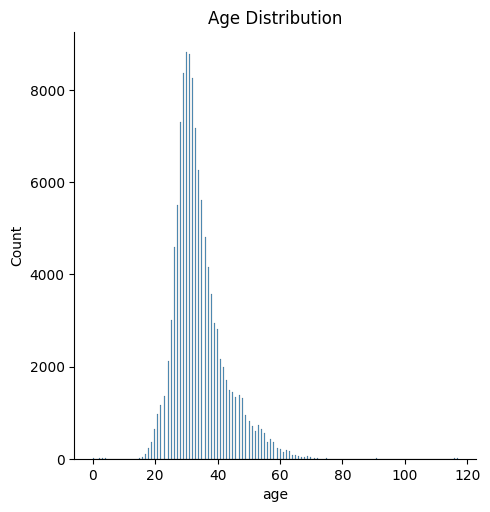

In [10]:
# Age distribution
sns.displot(df["age"])
plt.title("Age Distribution")
plt.show()

* A significant portion of the population appears to fall within the age range of 25 to 35 years old.

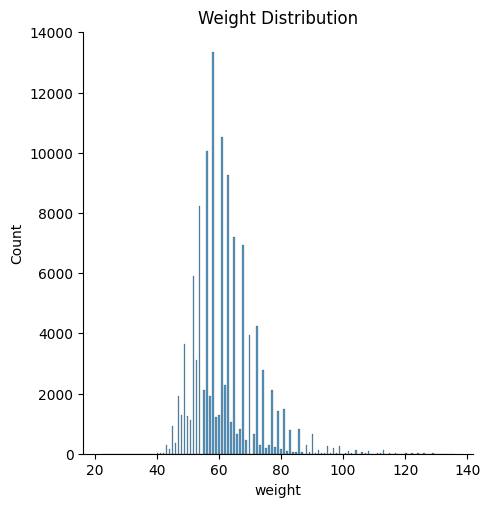

In [11]:
# Weight distribution
sns.displot(df["weight"])
plt.title("Weight Distribution")
plt.show()

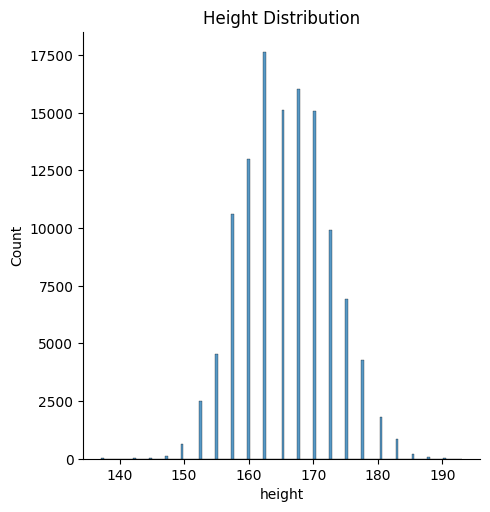

In [12]:
# height distribution
sns.displot(df["height"])
plt.title("Height Distribution")
plt.show()

* Weight and height distributions within the population appear to exhibit reasonably normal patterns.

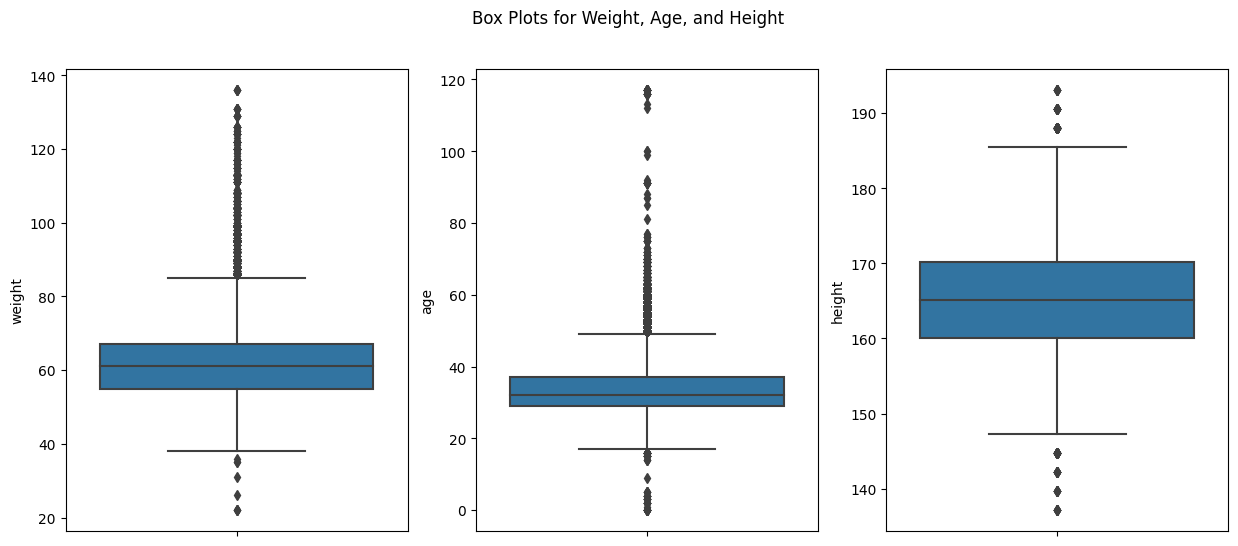

In [13]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('Box Plots for Weight, Age, and Height')

for i,col in enumerate(df.describe().columns):
    sns.boxplot(data=df,y=col,ax=axes[i])

* We notice the presence of unusual data points, known as outliers, which stand out from the typical pattern of the dataset.
* These outliers can potentially skew our analysis .

## **Data Preprocessing**

Handling Duplicates values

In [14]:
df_cleaned = df.drop_duplicates()

Handling Missing values

In [15]:
# Replace missing values in 'age' with mean
mean_age = df_cleaned['age'].mean()
df_cleaned['age'] = df_cleaned['age'].fillna(mean_age)

# Replace missing values in 'height' with mean
mean_height = df_cleaned['height'].mean()
df_cleaned['height'] = df_cleaned['height'].fillna(mean_height)

Handling Outliers

In [16]:
# Removing Outliers
dfs = []
sizes = []
for size_type in df['size'].unique():
    sizes.append(size_type)
    ndf = df[['age','height','weight']][df['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)

for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
df= pd.concat(dfs)
df.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [17]:
# Check for missing values
df.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [18]:
# Filling missing data
df["age"] = df["age"].fillna(df['age'].median())
df["height"] = df["height"].fillna(df['height'].median())
df["weight"] = df["weight"].fillna(df['weight'].median())

In [19]:
# Mapping clothes size from strings to numeric
df['size'] = df['size'].map({"XXS": 1,"S": 2,"M" : 3,"L" : 4,"XL" : 5,"XXL" : 6,"XXXL" : 7})

**Feature engineering**
* For feature engineering, we will introduce two additional features to enhance model training effectiveness:

* bmi (body-mass index): A metric widely used in medical contexts to assess obesity. It is calculated by dividing weight (in kilograms) by the square of height (in meters).
* weight-squared: This feature is the square of the weight and showcases exponential growth as weight increases.

In [20]:
# Creating new features
df["bmi"] = df["height"] / df["weight"]
df["weight-squared"] = df["weight"] * df["weight"]


In [21]:
df.head()

,age,height,weight,size,bmi,weight-squared
0,-0.833326,0.767729,-0.660757,5,-1.161894,0.436599
24,-0.713290,1.539527,1.556338,5,0.989198,2.422189
25,-0.353183,-1.161765,-0.291241,5,3.989017,0.084821
28,-0.473219,-1.933562,-1.399788,5,1.381325,1.959407
34,0.126960,-0.775866,0.447791,5,-1.732653,0.200517


## **Define Target Variable (y) and Feature Variables (X)**

In [22]:
# Features
X = df.drop("size", axis=1)

# Target
y = df["size"]


## **Train Test Split**

In [23]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=51)

## **Modeling**

We will proceed with training the following machine learning models:

1. **Logistic Regression**
2. **K-Nearest Neighbors**
3. **Random Forest Classifier**
4. **Decision Tree Classifier**

In [24]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier()}

In [25]:
# Creating a function fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Set random seed
    np.random.seed(42)

    # Dictionary to store model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


## **Model Evaluation**

In [26]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
# Checking Model Scores
model_scores

{'Logistic Regression': 0.2498016453000376,
 'KNN': 0.8900070990103145,
 'Random Forest': 0.9983714035160981,
 'Decision Tree': 0.9993318578527581}

* We will proceed with the **Decision Tree Classifier** model, as it demonstrated the highest accuracy of 99.93% in initial evaluations.

In [27]:
model=models.get("Decision Tree")
model

DecisionTreeClassifier()

## **Prediction**

In [28]:
y_pred = model.predict(X_test)
y_pred

array([3, 7, 7, ..., 2, 7, 3])

## **Explaination**

The clothing size prediction project achieved a remarkable accuracy of 99.93% using the DecisionTreeClassifier model. This means that the model accurately predicts clothing sizes based on individuals' age, weight, and height, demonstrating its strong ability to capture patterns and generalize to new data effectively. This high accuracy has practical implications for enhancing customer experiences in clothing selection and reducing sizing-related issues.